## Solving MDPs using Policy Iteration

# Policy Iteration

Policy iteration is a dynamic programming approach.

Policy Iteration involves two steps:

1. Policy Evaluation

2. Policy Improvement

## Policy Evaluation

We evaluate the policy to compute value of states when following that policy.

Recall, we define value of state $s$ under policy $\pi$ as,

$$V_{\pi}(s) := \mathbb{E}_{\pi} \big [ G_t | S_t = s \big ], \quad \forall s \in \mathcal{S}$$

We define action-value of state-action spair $(s,a)$ under policy $\pi$ as,

$$Q_{\pi}(s, a) := \mathbb{E}_{\pi} \big [ G_t | S_t = s, A_t = a \big ], \quad \forall s \in \mathcal{S}$$

We compute the expected return $V_{\pi}(s)$ for each state using the Bellman equation as follows, 

$$Q_{\pi}(s, a) = \sum_{s'} \mathcal{T}(s' | s, a) \big [\mathcal{R}(s,a,s') + \gamma \cdot V_{\pi}(s') \big ]$$

$$V_{\pi}(s) = Q_{\pi}(s, \pi(s) = a)= \mathbb{E}_{\pi} \big [ G_t | S_t = s, A_t = \pi(s)\big ]$$

where $V_{\pi}(s)$ denotes the value of the states when acting according to policy $\pi(s)$.  

If the policy is optimal, the values of the states are optimal $V_{*}(s)$ as defined in the previous tutorial. 

### Policy improvement

In this step, we improve the policy $\pi(s)$ by acting greedily with respect to the estimated $V_{\pi}(s)$ in the previous step.

$$ Q_{\pi}(s, \hat a) = \sum_{s'} \mathcal{T}(s' | s, \hat a) \big [\mathcal{R}(s,\hat a,s') + \gamma \cdot V_{\pi}(s')]$$

$$\pi'(s) = \mathrm{argmax_{\hat a}} Q_{\pi}(s, \hat a).$$

We call the new (improved) policy $\pi'(s)$.

We are able to obtain a new policy simply by acting greedily with respect to $Q_{\pi}(s, \hat a)$ due to the *policy improvement theorem*.

In somewhat simpler words, 

- We start with a random policy and evaluate the 'value' / 'worth' of each state $V_{\pi}(s)$ under that policy (policy evaluation). 

- To improve the current policy $\pi(s)$, you reconsider the actions in each state prescribed by that policy. 

- In a given state $s$, you evaluate all actions-values $Q_{\pi}(s, \hat a)$ and compare it with you current policy (which prescribes action $\pi(s) = a$). 

- If the maximum value corresponds to $\bar a \neq a$, i.e. the best action is different from the one prescribed by policy, we simply update our policy to $\pi'(s) = \bar a$ (policy improvement theorem).

- Repeat for all states.

- We evaluate the new policy $\pi'(s)$ and repeat the process until we obtain the optimal policy.

The algorithm can be seen as follows,

$ \pi(s) \xrightarrow{\text{E}} V_{\pi}(s) \xrightarrow{\text{I}} \pi'(s) \xrightarrow{\text{E}} \ldots \pi_{*}(s)$

where $\xrightarrow{\text{E}}$ represents *policy evaluation* and $\xrightarrow{\text{I}}$ represents *policy improvement*.

# Example: Frozen Lake

ITERATION: 0

$\pi_0$ = random actions

$V_{\pi_0}$ = random values

<div align="center"> 
<img src="images/1.png"  width="80%"/>
</div>

ITERATION: 1

<div align="center"> 
<img src="images/2.png"  width="80%"/>
</div>

ITERATION: 2

<div align="center"> 
<img src="images/3.png"  width="80%"/>
</div>

ITERATION: 3

<div align="center">
<img src="images/4.png"  width="80%"/>
</div>

ITERATION: 4

<div align="center"> 
<img src="images/5.png"  width="80%"/>
</div>

ITERATION: 5

<div align="center"> 
<img src="images/6.png"  width="80%"/>
</div>

ITERATION: 6

<div align="center"> 
<img src="images/7.png"  width="80%"/>
</div>

## Python code

In [7]:
import copy

import numpy as np
from frozen_lake import FrozenLake

import matplotlib.pyplot as plt
import seaborn as sns
from utils import plot_policy, plot_values, format_plot

## Initialise Environment

In [8]:
env = FrozenLake()
# env = FrozenLake(prob_slip=0.1)

num_states = env.observation_space.n
num_actions = env.action_space.n
DISCOUNT_FACTOR = 0.9

## Policy Evaluation

    Initialise accuracy threshold

    Randomly initialise V(s) under current policy

    Loop until error > accuracy threshold

        Set error = 0

        Loop over all states s in S:
            get old V(s) under current policy

            get action from current policy: pi(s)

            compute new value of state under policy

            compute error: old value - new value

In [9]:
def evaluate_policy(policy):

    # Initialise values of all states
    # under policy pi
    v_pi = np.random.rand(num_states)

    accuracy_threshold = 1e-3
    error = 10

    while error > accuracy_threshold:
        error = 0

        # loop over all states
        for state in range(num_states):

            old_value = v_pi[state]
            action = policy[state] # get action from policy

            q_val = 0

            tuples = env.MDP(state, action)
            for tuple in tuples:
                prob, next_state, reward, done = tuple
                # Q_pi(s,a) = ∑ T(s'|s, pi(s)=a) [R(s) + V_pi(s')]
                future_value = v_pi[next_state] * int(1 - done) # set future values of done states to 0
                q_val += prob * (reward + DISCOUNT_FACTOR * future_value)

            # we overwrite the previous estimate of the state value
            v_pi[state] = q_val

            # evaluate the difference between the old and new value
            error = max([error, np.abs(old_value - q_val)])
    
    return v_pi

## Policy Evaluation + Improvement

    Initialise Q (empty) table (for actions-values under current policy)

    Randomly initialise policy

    Loop until optimal policy is found:

        Evaluate current policy

        Loop over all states s in S:
            get action under current policy

            Loop over all actions a in A:
                compute Q(s, a)

            get actions with max Q(s, a) (best actions) --> policy improvement

            update current policy 

            check if old action in best actions

In [10]:
# Initialisations
q_values = np.empty((num_states, num_actions))
# we store only one action per state
policy = np.random.randint(0, 4, size=num_states)

# we store all optimal actions for a state
complete_policy = {}
for state in range(num_states):
    complete_policy[state] = [0, 1, 2, 3]

store_v_pi = []
store_policy = []
store_policy.append(copy.deepcopy(complete_policy))

In [11]:
stable_policy = False
while not stable_policy:

    # evaluate the policy
    v_pi = evaluate_policy(policy)
    
    # (optional)
    # store output of each iteration for plotting
    store_v_pi.append(copy.deepcopy(v_pi))

    # assume this policy is stable
    stable_policy = True

    # loop over all states
    for state in range(num_states):

        # get old action from policy 
        old_action = policy[state]

        # compute Q values of all actions
        for action in range(num_actions):
            q_val = 0

            tuples = env.MDP(state, action)
            for tuple in tuples:
                prob, next_state, reward, done = tuple
                # Q_pi(s,a) = ∑ T(s'|s,a) [R(s) + V_pi(s')]
                future_value = v_pi[next_state] * int(1 - done) # set future values of done states to 0
                q_val += prob * (reward + DISCOUNT_FACTOR * future_value)
           
            # overwrite the Q value estimate
            q_values[state, action] = q_val

        # we can have more than one optimal action per state
        # here, we get all actions whose q_value is equal to q_max
        best_actions = np.flatnonzero(q_values[state, :]  == max(q_values[state, :]))
        # we break ties randomly, 
        # i.e. select best actions randomly with equal probability 
        new_action = np.random.choice(best_actions)
        policy[state] = new_action

        # (optional)
        complete_policy[state] = list(best_actions)

        # since more than one action can be optimal in a given state,
        # we must check all actions
        if old_action not in best_actions:
            stable_policy = False

    # (optional)
    # store output of each iteration for plotting
    store_policy.append(copy.deepcopy(complete_policy))

## Plots results

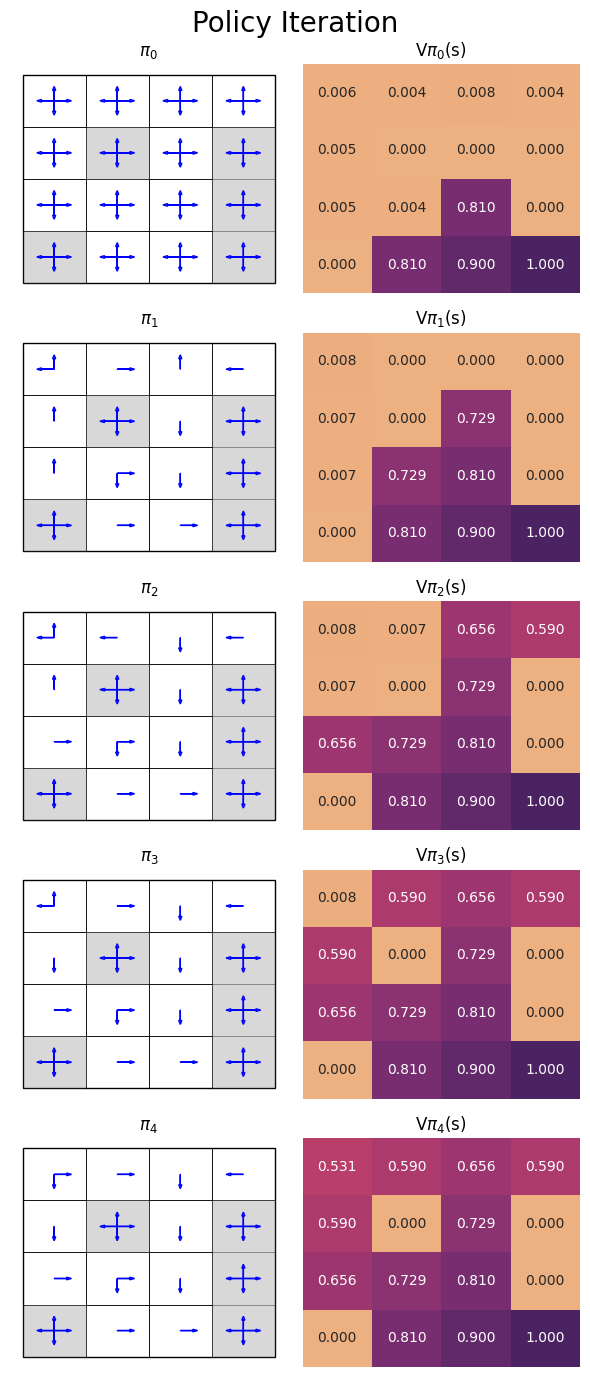

In [17]:
num_plots = len(store_policy) - 1

fig, ax = plt.subplots(num_plots, 2, figsize=(6, 14))

for k in range(num_plots):

    plot_policy(ax[k][0], store_policy[k])
    plot_values(ax[k][1], store_v_pi[k])
    
    # cleaning up plots
    format_plot(ax[k][0])
    format_plot(ax[k][1])

    ax[k][0].set_title(f'$\pi_{{{k}}}$')
    ax[k][1].set_title(f'V$\pi_{{{k}}}$(s)')

fig.suptitle('Policy Iteration', fontsize=20)
fig.tight_layout()
plt.show()

### Similarities between Value iteration and Policy iteration

- Value iteration can be seen as a special case of policy iteration

- We carry out policy evaluation just for 1 step (unlike in policy iteration where we loop until convergence) and 1 step of policy improvement.

## Takeaways

 - Policy Iteration has two phases: Policy evaluation and Policy Improvement.

 
 - Policy Evaluation estimates the expected return for each state $s$ from the policy $\pi$.

 
 - Policy Improvement improves the policy $\pi$ by acting greedily wrt to it.

 - Value iteration is a special case of policy iteration, where we only carry out one step of policy evaluation and one step of policy improvement. 

In the next tutorial, we will see our first reinforcement learning algorithm and train an agent with it!

# References

Brockman, G.. OpenAI Gym. arXiv (2016). https://arxiv.org/pdf/1606.01540.pdf

Richard S. Sutton & Andrew G. Barto. Reinforcement learning : an introduction. (2020)